###ABDULJALIL_HASSAN_QAID_ALI_ TP073212

#                                        ✈️ Flight Price Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
###import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Flight_dataset/Clean_Dataset.csv', sep=',',encoding='windows-1252')
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
data.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


#DATA Visualizations


 #The most flight useed in the airlines

In [ ]:
data['flight'].value_counts()

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

In [ ]:
len(data['flight'].value_counts())

1561

##Top 7 source city and the distenision by price**



In [ ]:
x= data.groupby(['source_city','destination_city'])['price'].sum().reset_index().sort_values(["price"], ascending = False)
x[0:7]

,source_city,destination_city,price
4,Bangalore,Mumbai,299261197
25,Mumbai,Bangalore,298260354
14,Delhi,Mumbai,295931282
29,Mumbai,Kolkata,282022007
27,Mumbai,Delhi,277303264
24,Kolkata,Mumbai,253178558
10,Delhi,Bangalore,250537591


##Highest 5 flights in the airlines based on prices

In [ ]:
n=data.groupby(['flight','airline'])['price'].count().reset_index().sort_values(["price"], ascending = False)
n[0:5]

,flight,airline,price
1442,UK-706,Vistara,3235
1454,UK-772,Vistara,2741
1445,UK-720,Vistara,2650
1490,UK-836,Vistara,2542
1477,UK-822,Vistara,2468


#Exploratory Data Analysis

###TOP 5 FLIGHTS AND AIRLINES BASED ON PRICE**

---



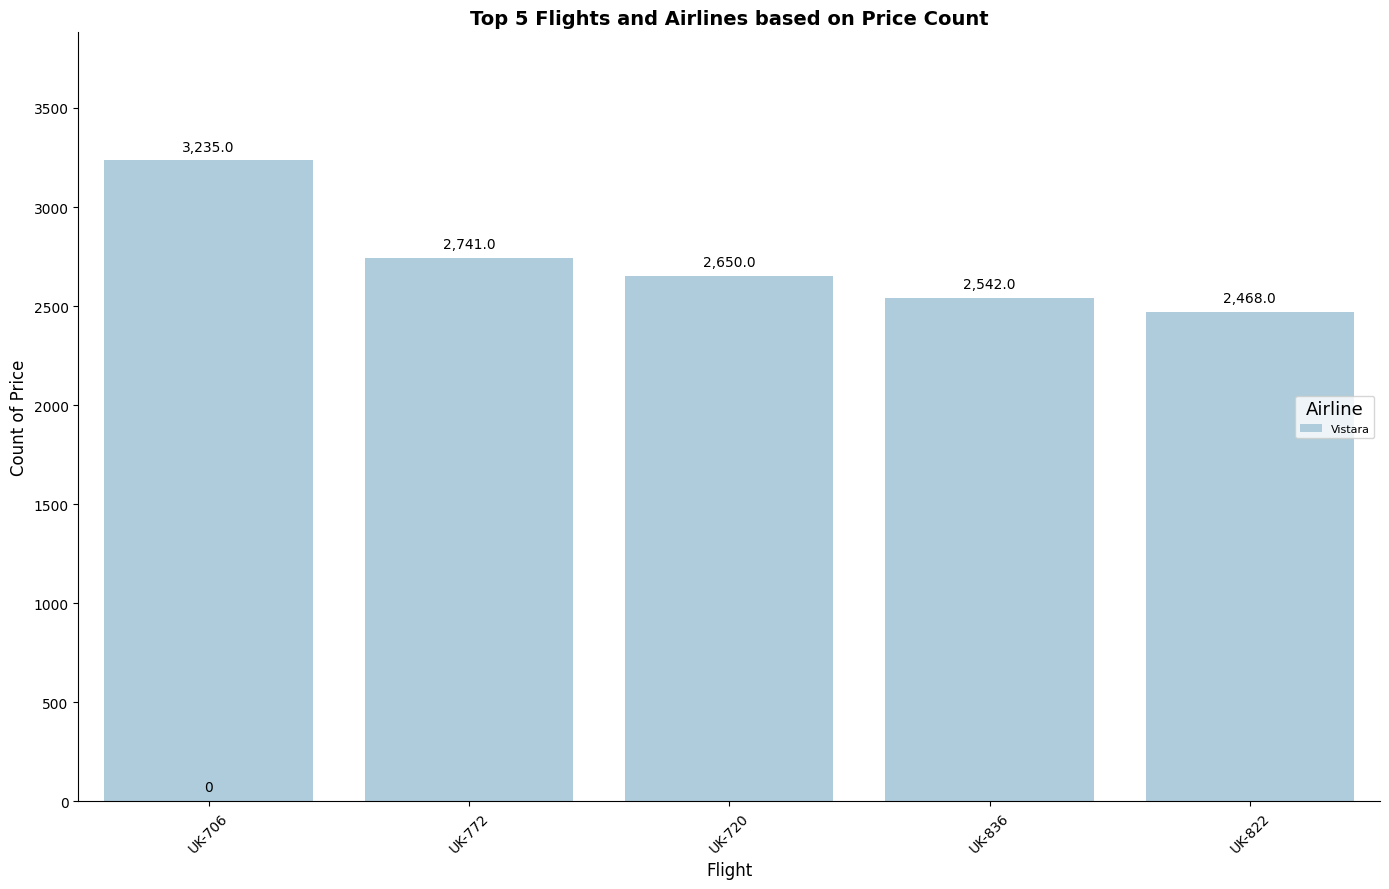

In [ ]:
# Here's the code snippet you provided with enhancements

n = data.groupby(['flight', 'airline'])['price'].count().reset_index().sort_values(["price"], ascending=False)
top_5_flights = n.head(5)

plt.figure(figsize=(14, 9))  # Increased figure size for better clarity
colors = sns.color_palette('Paired', len(top_5_flights))  # Using 'Paired' palette for better color distinction
ax = sns.barplot(x='flight', y='price', hue='airline', data=top_5_flights, palette=colors, dodge=False)

# Improved Annotations
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,}',  # This formats the number with commas
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')  # Slightly offset the text for better visibility

plt.xlabel('Flight', fontsize=12)  # Adjusted font size
plt.ylabel('Count of Price', fontsize=12)
plt.title('Top 5 Flights and Airlines based on Price Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)  # Rotate the x-axis labels to prevent overlap
ax.set_ylim(0, top_5_flights['price'].max() * 1.2)  # Adjust y-limit for annotation visibility

sns.despine()  # Remove the top and right spines for a cleaner look
plt.tight_layout()  # Adjust layout to make sure everything fits without overlap
plt.legend(title='Airline', title_fontsize='13', fontsize='8', loc='right')  # Improved legend

plt.show()


In [ ]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
eco=data[data['class']=='Economy']

In [ ]:
eco['airline'].value_counts()

Vistara      67270
Air_India    47994
Indigo       43120
GO_FIRST     23173
AirAsia      16098
SpiceJet      9011
Name: airline, dtype: int64

> **3-What is the most airline used in economy class and who has the most outcomes**

Text(0.5, 1.0, 'Distibution of most airliens in Economy class')

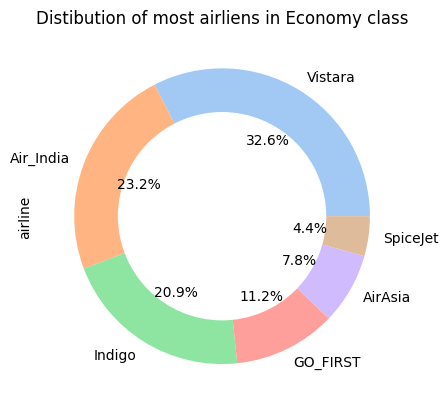

In [ ]:
colors = sns.color_palette('pastel')
eco['airline'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)

my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.gcf().gca().add_artist(my_circle)
plt.title('Distibution of most airliens in Economy class')


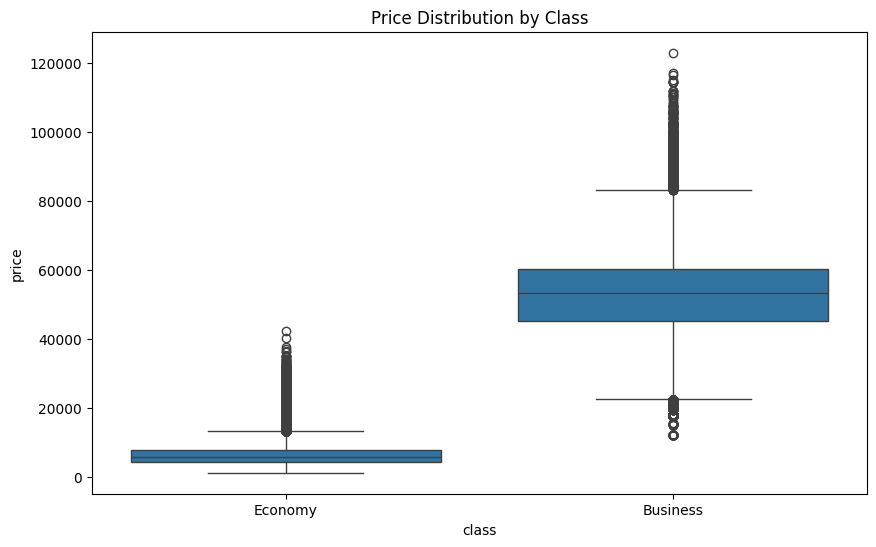

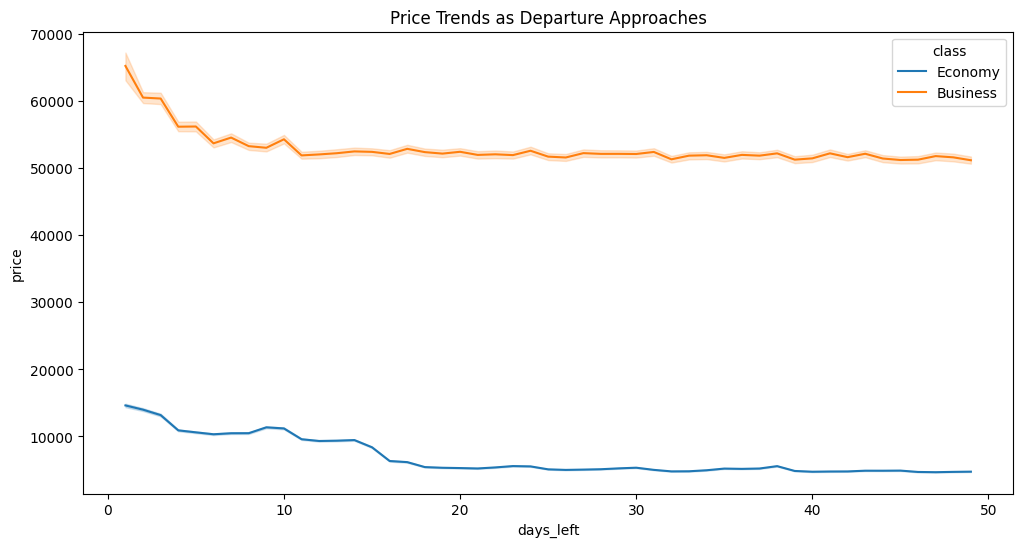

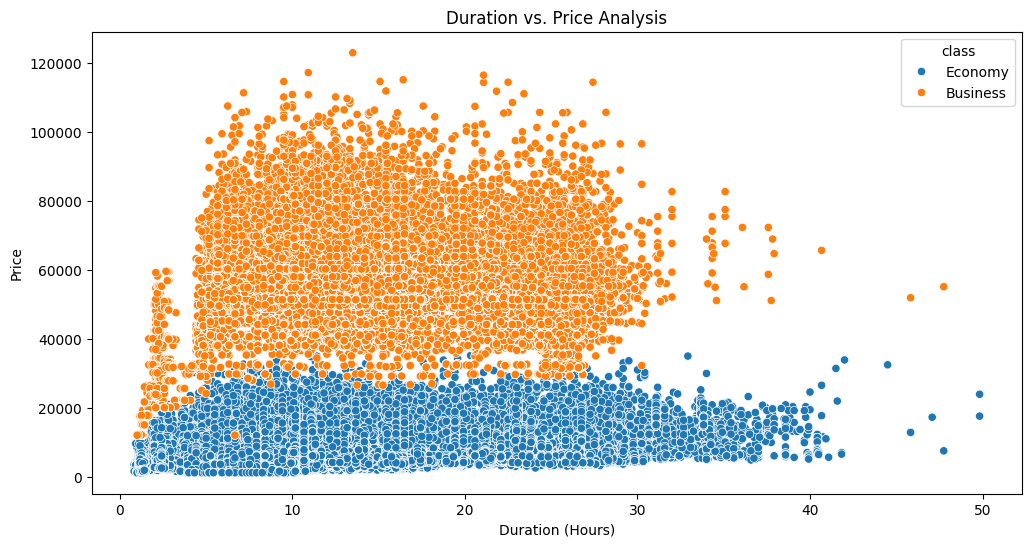

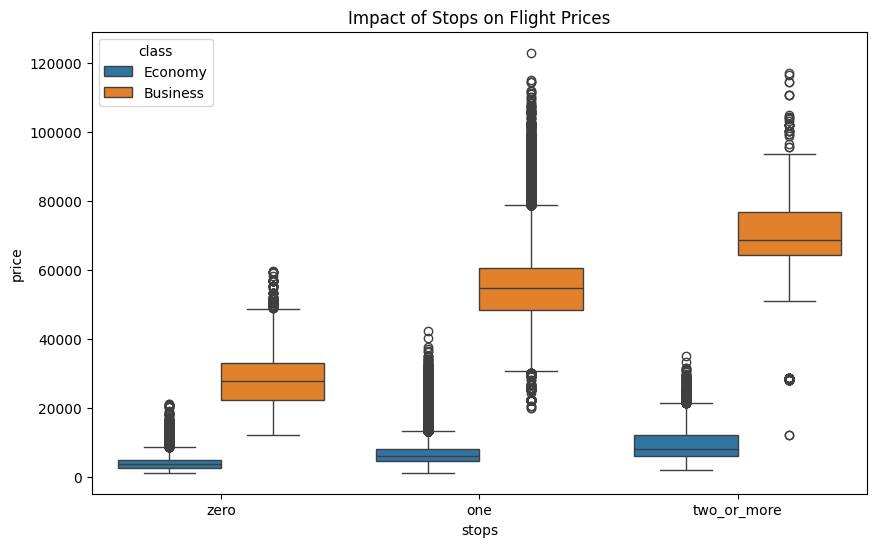

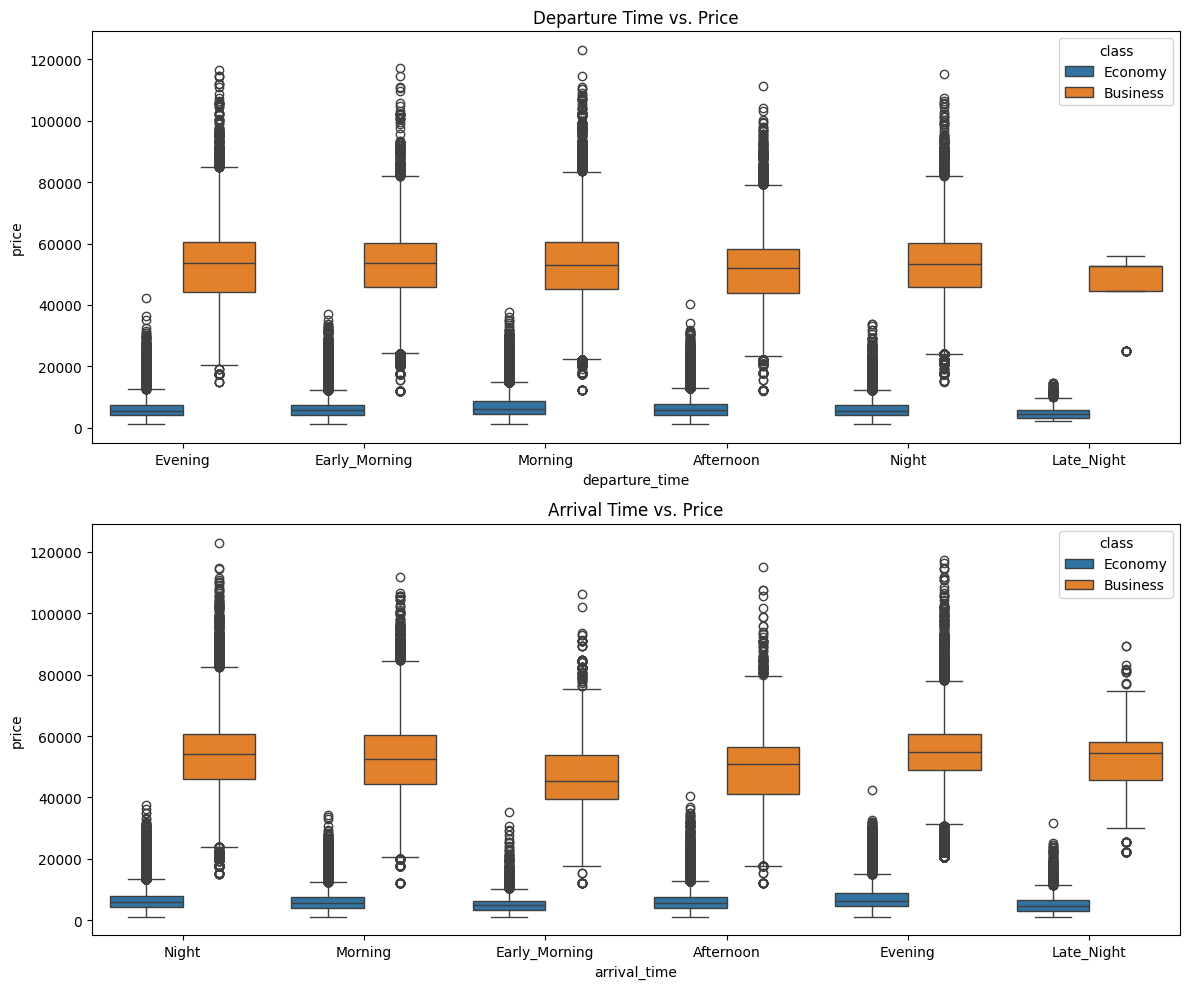

In [ ]:
# Price Distribution by Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='price', data=data)
plt.title('Price Distribution by Class')
plt.show()

# Price Trends Over Days Left
plt.figure(figsize=(12, 6))
sns.lineplot(x='days_left', y='price', hue='class', data=data)
plt.title('Price Trends as Departure Approaches')
plt.show()

# Duration vs. Price Analysis
plt.figure(figsize=(12, 6))
sns.scatterplot(x='duration', y='price', hue='class', data=data)
plt.title('Duration vs. Price Analysis')
plt.xlabel('Duration (Hours)')
plt.ylabel('Price')
plt.show()

# Stops Impact on Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='stops', y='price', hue='class', data=data)
plt.title('Impact of Stops on Flight Prices')
plt.show()

# Departure and Arrival Time Analysis
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
sns.boxplot(x='departure_time', y='price', hue='class', data=data, ax=axs[0])
axs[0].set_title('Departure Time vs. Price')
sns.boxplot(x='arrival_time', y='price', hue='class', data=data, ax=axs[1])
axs[1].set_title('Arrival Time vs. Price')
plt.tight_layout()
plt.show()


In [ ]:
n=eco.groupby(['airline'])['price'].sum().reset_index().sort_values(by='price',ascending=False)
n

,airline,price
5,Vistara,525173099
1,Air_India,351012862
3,Indigo,229580207
2,GO_FIRST,130973972
0,AirAsia,65858089
4,SpiceJet,55681482


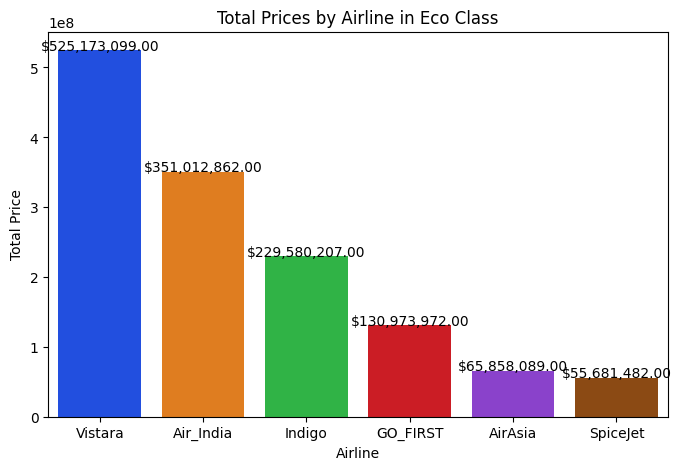

In [ ]:
# Group by 'airline', sum 'price' for each group, reset index, and sort by 'price' descending
n = eco.groupby(['airline'])['price'].sum().reset_index().sort_values(by='price', ascending=False)

# Set the figure size for the plot
plt.figure(figsize=(8, 5))

# Generate a color palette that has as many colors as there are airlines in 'n'
colors = sns.color_palette('bright', len(n))

# Create a barplot with 'airline' on the x-axis and 'price' on the y-axis, using the generated color palette
ax = sns.barplot(x='airline', y='price', data=n, palette=colors)

# Annotate each bar with the price in a dollar format
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

# Set the labels and title for the plot
plt.xlabel('Airline')
plt.ylabel('Total Price')
plt.title('Total Prices by Airline in Eco Class')

# Display the plot
plt.show()

> **Which city is most used in economic tickets?**

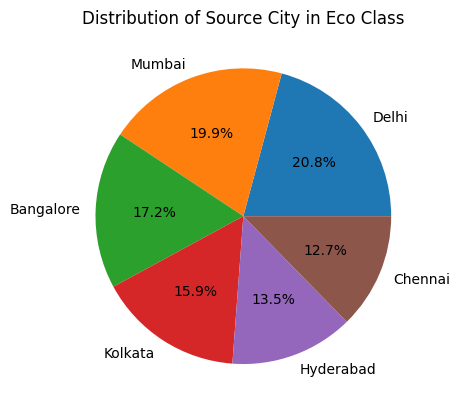

In [ ]:
eco['source_city'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Source City in Eco Class')
plt.ylabel('')  # Hides the 'source_city' label on the y-axis for a cleaner look
plt.show()


> ****most airlines used in business class and out comes**

In [ ]:
# Filter the DataFrame for 'Business' class flights
bus = data[data['class'] == 'Business']

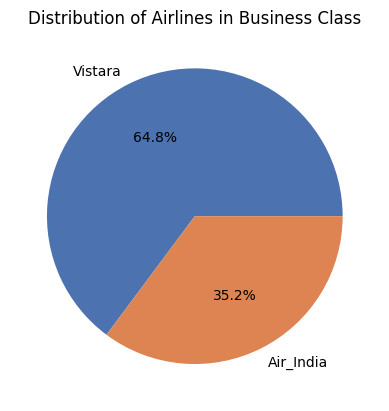

In [ ]:
# Generate a 'deep' color palette with seaborn, with as many colors as there are unique airlines in 'bus'
colors = sns.color_palette('deep', len(bus['airline'].unique()))

# Plotting the pie chart with the generated color palette
bus['airline'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)

# Additional plot adjustments for better visualization
plt.title('Distribution of Airlines in Business Class')
plt.ylabel('')  # Hides the 'airline' label on the y-axis for a cleaner look

# Display the plot
plt.show()

In [ ]:
m=bus.groupby(['airline'])['price'].sum().reset_index().sort_values(by='price', ascending=False)
m

,airline,price
1,Vistara,3361297636
0,Air_India,1550516928


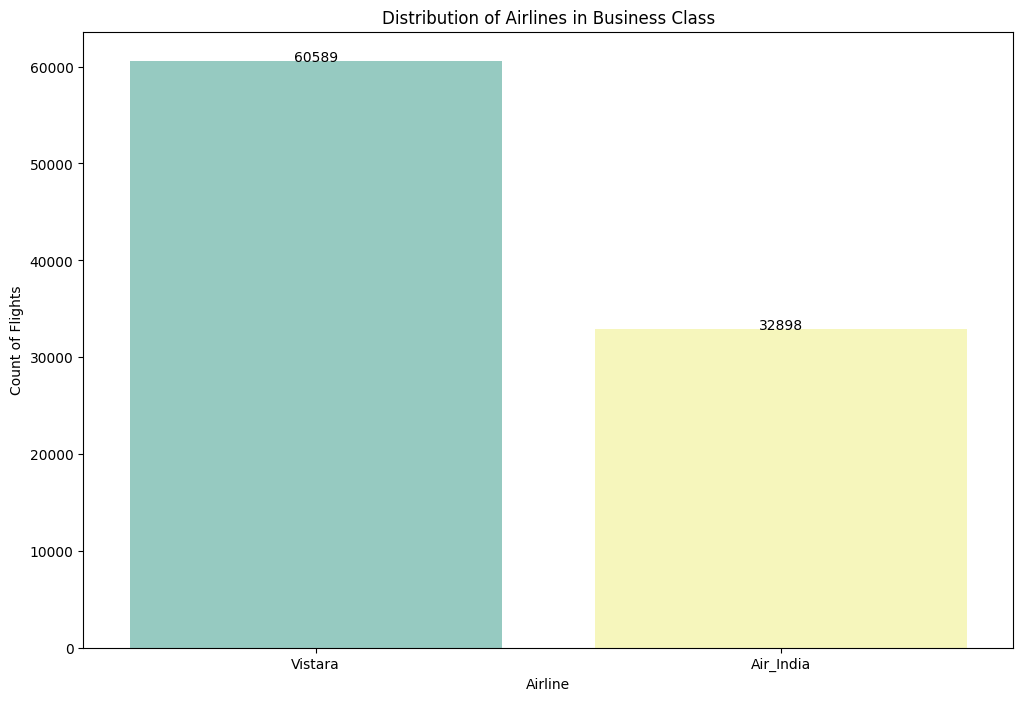

In [ ]:
# Calculate the count of flights per airline
colors_count = bus['airline'].value_counts()

# Set up the figure size
plt.figure(figsize=(12, 8))

# Generate a color palette with as many colors as there are unique airlines
colors = sns.color_palette('Set3', len(colors_count))

# Create the bar plot using seaborn
ax = sns.barplot(x=colors_count.index, y=colors_count.values, palette=colors)

# Annotate each bar with the count of flights
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', # Convert to int for cleaner display
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

# Set labels and title to accurately reflect the data being shown
plt.xlabel('Airline')
plt.ylabel('Count of Flights') # Adjusted to 'Count of Flights' for clarity
plt.title('Distribution of Airlines in Business Class')

# Display the plot
plt.show()

In [ ]:
bus.groupby(['airline'])['price'].mean().reset_index().sort_values(by='price', ascending=False)

,airline,price
1,Vistara,55477.027777
0,Air_India,47131.039212


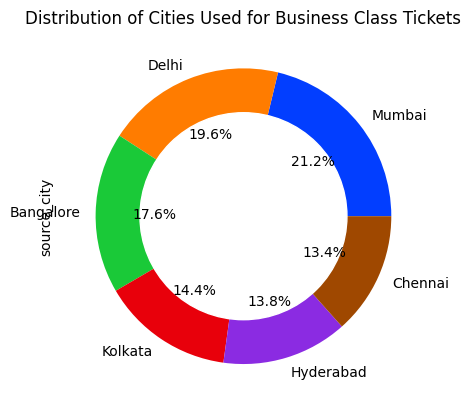

In [ ]:
# Generate a 'bright' color palette from seaborn
colors = sns.color_palette('bright')

# Plot the pie chart with the generated color palette
bus['source_city'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)

# Create a white circle for the donut chart effect
my_circle = plt.Circle((0, 0), 0.7, color='white')

# Add the white circle over the pie chart to create the donut effect
plt.gcf().gca().add_artist(my_circle)

# Set the title for the chart
plt.title('Distribution of Cities Used for Business Class Tickets')

# Display the plot
plt.show()

In [ ]:
df =data.groupby(['airline'])['price'].median()
df

airline
AirAsia       3276.0
Air_India    11520.0
GO_FIRST      5336.0
Indigo        4453.0
SpiceJet      5654.0
Vistara      15543.0
Name: price, dtype: float64

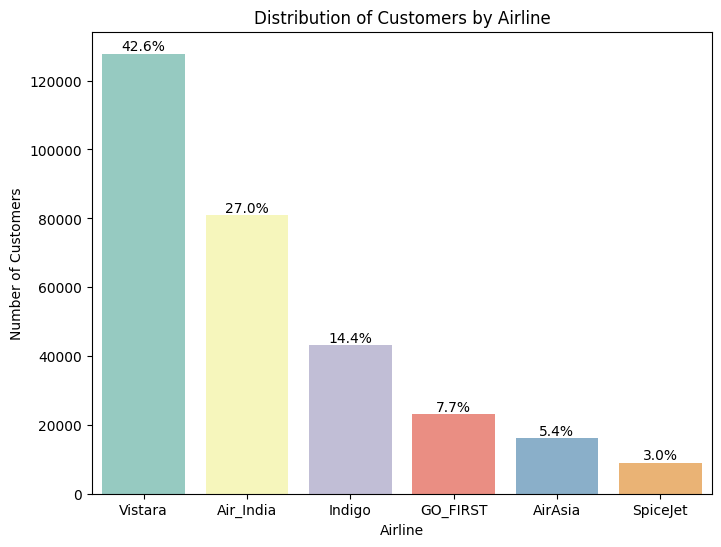

In [ ]:
# Count of customers (or bookings) per airline
dm = data['airline'].value_counts()

# Total number of customers (or bookings) in the dataset
total_customers = len(data)

# Calculate percentages
percentages = dm / total_customers * 100

# Choose a color palette from Seaborn
colors = sns.color_palette('Set3', n_colors=len(dm))

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=dm.index, y=dm, palette=colors)

# Annotating each bar with the percentage of total customers
for i, p in enumerate(plt.gca().patches):
    percentage = '{:.1f}%'.format(percentages[i])
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5  # Adjusting vertical position for readability
    plt.text(x, y, percentage, ha='center', va='bottom', fontsize=10, color='black')

# Adjusting the title and labels for accuracy and clarity
plt.title('Distribution of Customers by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Customers')  # Reflecting that the y-axis shows the count of customers

plt.show()

> **How does the ticket price vary between Economy and Business class?**

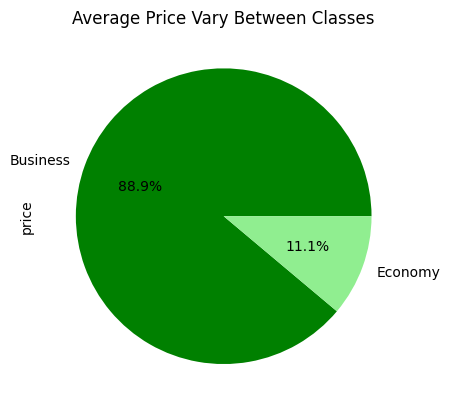

In [ ]:
colors = ['Green', 'lightgreen', 'salmon', 'violet', 'orange']

# Plotting the pie chart with the custom color palette
data.groupby(['class'])['price'].mean().plot(kind='pie', title='Average Price Vary Between Classes', autopct="%1.1f%%", colors=colors)

plt.show()

> **How does the ticket price vary between Economy and Business class?**

Text(0.5, 1.0, 'Airlines Based on Business')

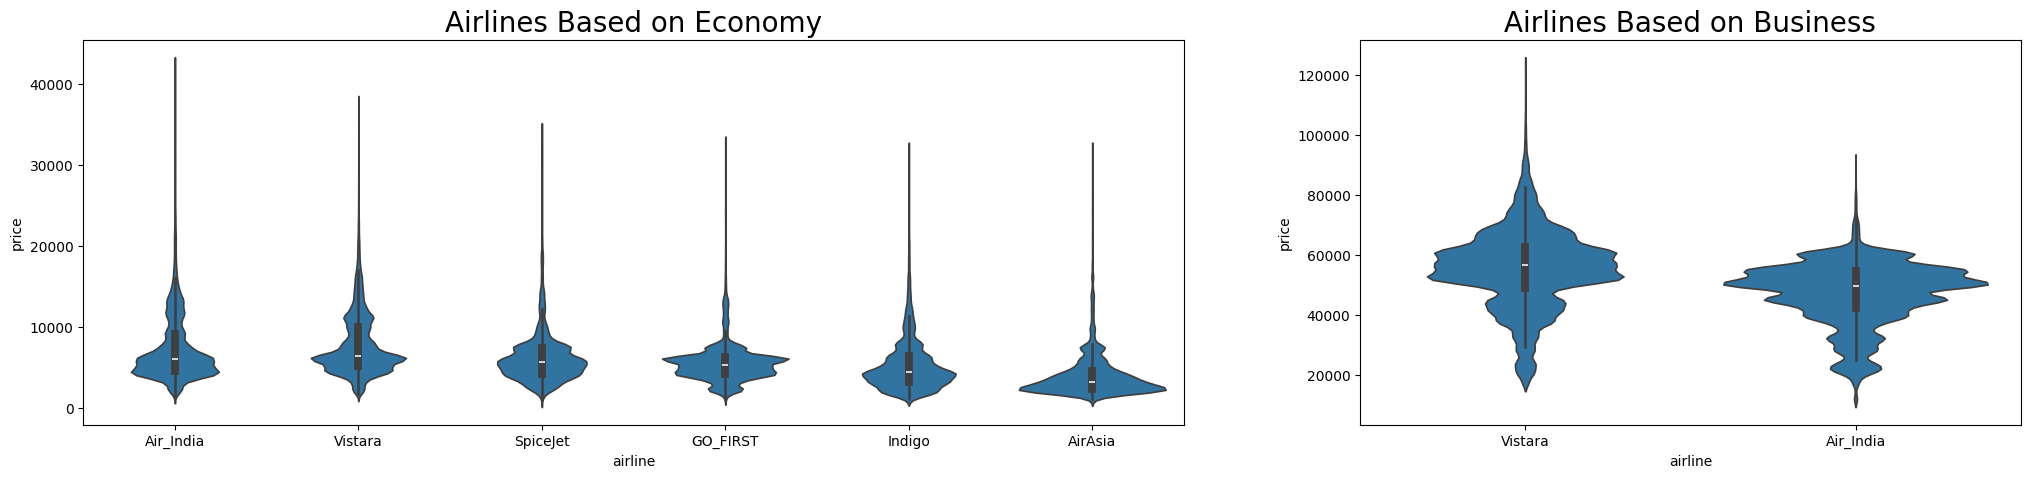

In [ ]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.violinplot(x='airline', y='price', data=data.loc[data['class']=='Economy'].sort_values(by='price', ascending=False), ax=axs[0])
axs[0].set_title('Airlines Based on Economy', fontsize=20)
sns.violinplot(x='airline', y='price', data=data.loc[data['class']=='Business'].sort_values(by='price', ascending=False), ax=axs[1])
axs[1].set_title('Airlines Based on Business', fontsize=20)


> **How does the ticket price vary with the number of stops of a Flight?**

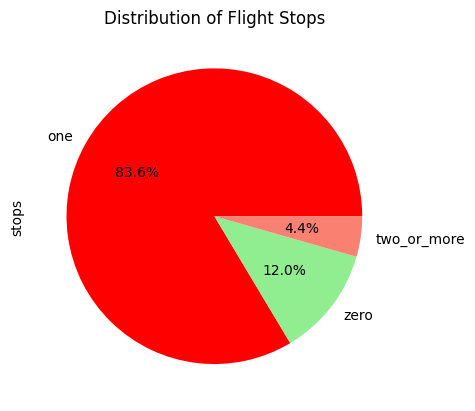

In [ ]:
# Define or reuse a custom color palette
colors = ['Red', 'lightgreen', 'salmon', 'violet', 'orange']

# Plotting the pie chart for the distribution of stops
data['stops'].value_counts().plot(kind='pie', autopct="%1.1f%%", colors=colors, title='Distribution of Flight Stops')

plt.show()

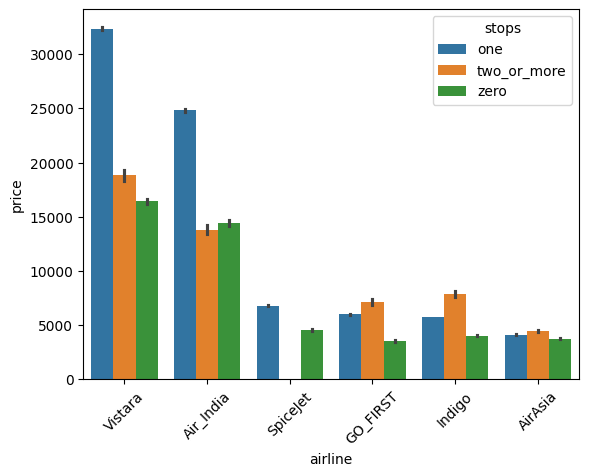

In [ ]:
# Plotting the bar plot
sns.barplot(y="price", x="airline", hue="stops", data=data.sort_values("price", ascending=False))

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

In [ ]:
data['source_to_destionation']=data['source_city']+' to '+data['destination_city']
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_to_destionation
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai to Hyderabad
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai to Hyderabad
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai to Hyderabad
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai to Hyderabad


In [ ]:
data.groupby(['source_to_destionation','airline'])['price'].size().reset_index().sort_values(by='price',ascending=False)

,source_to_destionation,airline,price
89,Delhi to Mumbai,Vistara,5840
165,Mumbai to Delhi,Vistara,5812
11,Bangalore to Delhi,Vistara,5423
29,Bangalore to Mumbai,Vistara,5380
65,Delhi to Bangalore,Vistara,5379
...,...,...,...
46,Chennai to Hyderabad,SpiceJet,51
44,Chennai to Hyderabad,GO_FIRST,38
97,Hyderabad to Chennai,GO_FIRST,38
16,Bangalore to Hyderabad,SpiceJet,31


> **what the mean price and duration of flight with source city to destination city**

In [ ]:
m=data.groupby(['source_to_destionation'])['price'].mean().reset_index().sort_values(by='price',ascending=False)
m[0:5]

,source_to_destionation,price
5,Chennai to Bangalore,25081.850454
21,Kolkata to Chennai,23660.361040
3,Bangalore to Kolkata,23500.061229
0,Bangalore to Chennai,23321.850078
25,Mumbai to Bangalore,23147.873807


**numbers of stops in each travel**

<Figure size 640x480 with 0 Axes>

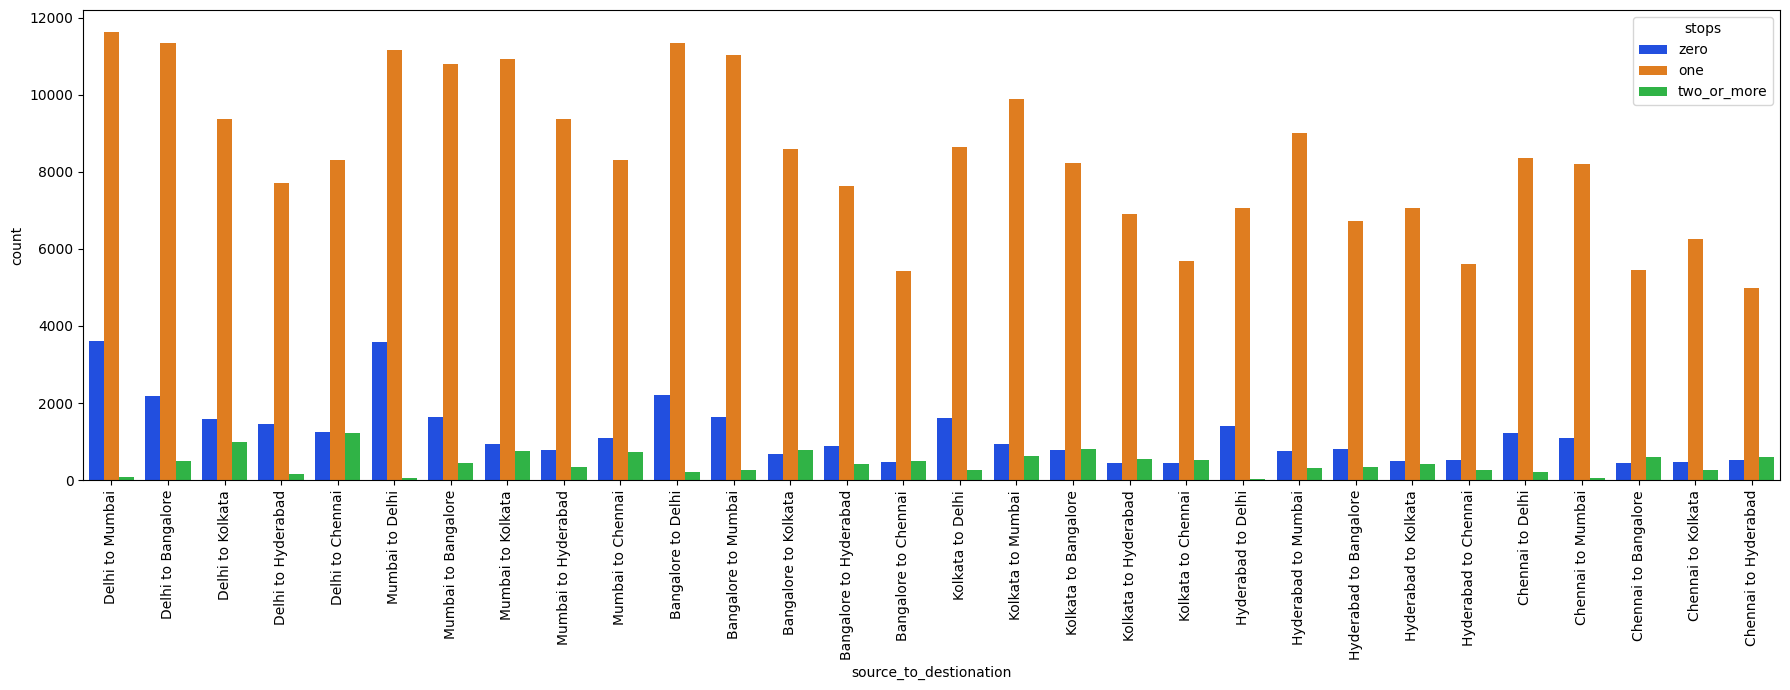

In [ ]:
colors=sns.color_palette('bright')
plt.clf()
plt.figure(figsize=(18,7))
sns.countplot(x='source_to_destionation',hue='stops',data=data,palette=colors)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
dn =data.groupby(['days_left'])['price'].mean()


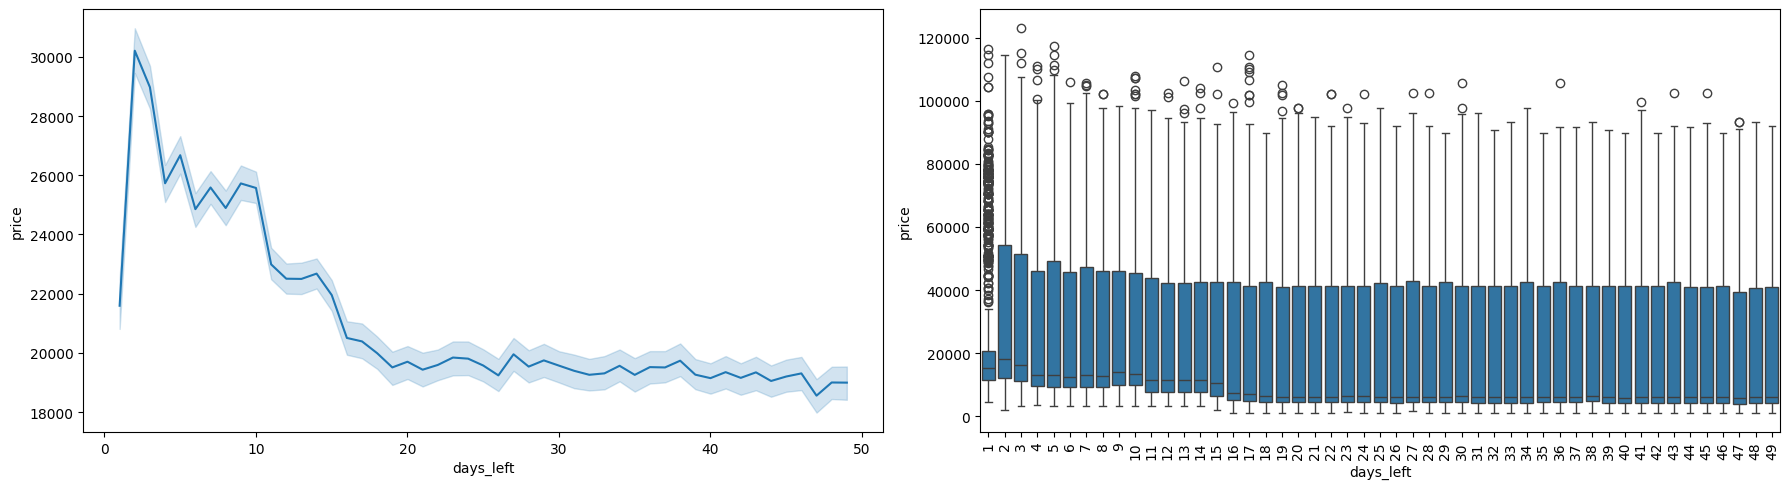

In [ ]:
fig,axs = plt.subplots(1,2,figsize=(18,5))
plt.tight_layout()
sns.lineplot(x= 'days_left' ,y='price',data=data,ax=axs[0])
sns.boxplot(y='price',x='days_left',data=data,ax=axs[1])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
data['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
def offer(x):
    if x['days_left'] == 1:
        return "5%offer"
    elif x['days_left'] > 1 and x['days_left'] <= 8:
        return '7%offer'
    elif x['days_left'] > 8 and x['days_left'] <= 15:
        return '10%offer'
    else:
        return 'no offer'

data['offer'] = data.apply(offer, axis=1)

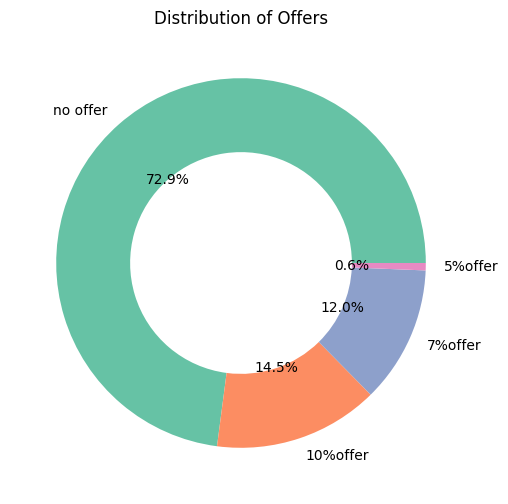

In [ ]:
# Define a custom color palette
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

# Plotting the pie chart for the distribution of offers with improved aesthetics
plt.figure(figsize=(8, 6))  # Adjust the figure size for better visualization
plt.pie(data['offer'].value_counts(), labels=data['offer'].value_counts().index, autopct="%1.1f%%", colors=colors, wedgeprops=dict(width=0.4))

# Add a title to the pie chart
plt.title('Distribution of Offers')

# Display the plot
plt.show()

> <div class="alert alert-block alert-info">
<b>Based on the analysis, most flights on the first day are booked. Therefore, some airlines have raised ticket prices on that day, and the flights that were not filled on that day have a reduction in their ticket prices, so we do not need to reduce the price further. </div>

In [ ]:
city_count=dict(data['source_city'].value_counts())
city_count

{'Delhi': 61343,
 'Mumbai': 60896,
 'Bangalore': 52061,
 'Kolkata': 46347,
 'Hyderabad': 40806,
 'Chennai': 38700}

In [ ]:
def offer_city(count):
    if  count>=60000:
        return('offer5%')
    if   45000 <= count < 60000:
         return('offer7%')
    if   30000<= count <45000:
        return('offer10%')
    else:
        return('no offer')
data['offer_city']=data['source_city'].map(city_count).apply(offer_city)

> <div class="alert alert-block alert-info">
<b>In the cities that have a large number of flights, we will give a good discount in order to target more travelers, and in the cities that have fewer flights, we will give a bigger discount in order to target more people.. </div>

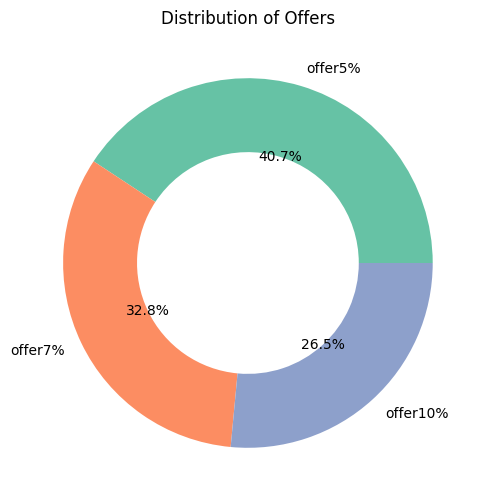

In [ ]:
# Define a custom color palette
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

# Plotting the pie chart for the distribution of offers with improved aesthetics
plt.figure(figsize=(8, 6))  # Adjust the figure size for better visualization
plt.pie(data['offer_city'].value_counts(), labels=data['offer_city'].value_counts().index, autopct="%1.1f%%", colors=colors, wedgeprops=dict(width=0.4))

# Add a title to the pie chart
plt.title('Distribution of Offers')

# Display the plot
plt.show()

In [ ]:
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_to_destionation,offer,offer_city
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi to Mumbai,5%offer,offer5%
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi to Mumbai,5%offer,offer5%
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi to Mumbai,5%offer,offer5%
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi to Mumbai,5%offer,offer5%
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi to Mumbai,5%offer,offer5%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,Chennai to Hyderabad,no offer,offer10%
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,Chennai to Hyderabad,no offer,offer10%
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,Chennai to Hyderabad,no offer,offer10%
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,Chennai to Hyderabad,no offer,offer10%


#  3-  ✈️| PREPROCESSING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=data.copy()

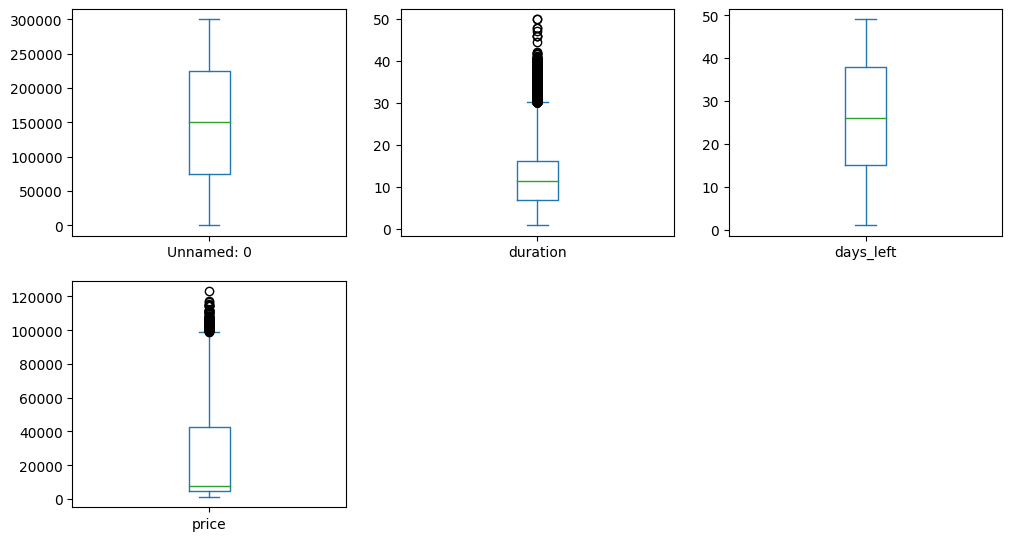

In [ ]:
# Plotting the box plots with smaller figure size
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 10))  # Adjust the figsize here
# Show the plot
plt.show()

In [ ]:
# Calculate the IQR for 'price' and 'duration'
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_duration = df['duration'].quantile(0.25)
Q3_duration = df['duration'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration

# Define bounds for outliers
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

lower_bound_duration = Q1_duration - 1.5 * IQR_duration
upper_bound_duration = Q3_duration + 1.5 * IQR_duration

# Filter out outliers from both 'price' and 'duration'
filtered_df = df[(df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price) &
                 (df['duration'] >= lower_bound_duration) & (df['duration'] <= upper_bound_duration)]

filtered_df


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


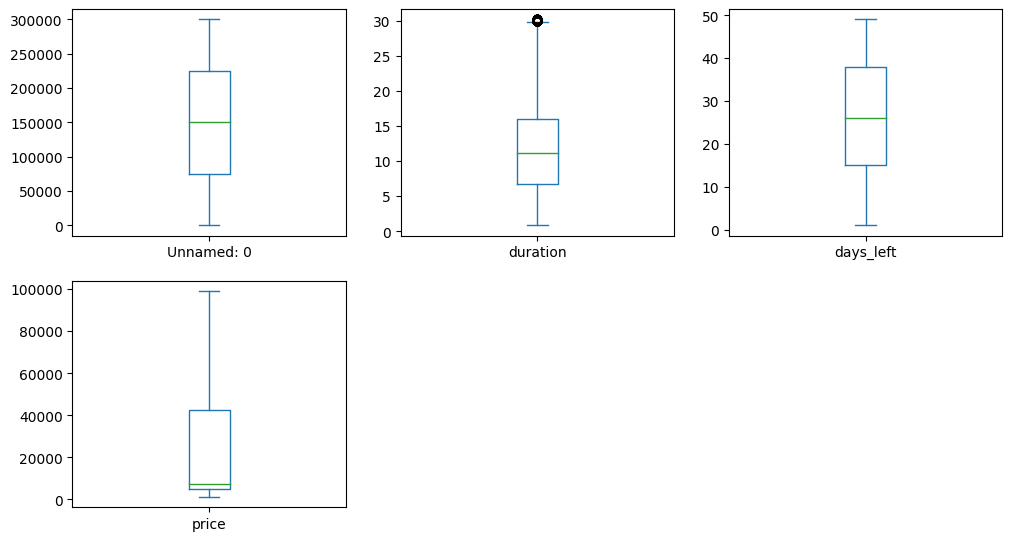

In [ ]:
# Plotting the box plots with smaller figure size
filtered_df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 10))  # Adjust the figsize here

# Show the plot
plt.show()

In [ ]:
df=filtered_df

In [ ]:
#Encoding

In [ ]:
duplicated=df.duplicated()
duplicated.sum()

0

In [ ]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
df.describe(include='object')


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,297920,297920,297920,297920,297920,297920,297920,297920
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,126917,3116,61156,70372,249478,90702,58656,204792


In [ ]:
df['airline'].value_counts()

Vistara      126917
Air_India     79601
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [ ]:
# Initialize a separate label encoder for each categorical feature
airline_encoder = LabelEncoder()
source_city_encoder = LabelEncoder()
destination_city_encoder = LabelEncoder()
departure_time_encoder = LabelEncoder()
arrival_time_encoder = LabelEncoder()
stops_encoder = LabelEncoder()
class_encoder = LabelEncoder()
arrival_time_of_day_encoder = LabelEncoder()
weekday_weekend_encoder = LabelEncoder()
departure_time_of_day_encoder = LabelEncoder()
flight_encoder = LabelEncoder()

# Apply fit_transform with the correct encoder for each feature
df['airline'] = airline_encoder.fit_transform(df['airline'])
df['source_city'] = source_city_encoder.fit_transform(df['source_city'])
df['destination_city'] = destination_city_encoder.fit_transform(df['destination_city'])
df['departure_time'] = departure_time_encoder.fit_transform(df['departure_time'])
df['arrival_time'] = arrival_time_encoder.fit_transform(df['arrival_time'])
df['stops'] = stops_encoder.fit_transform(df['stops'])
df['class'] = class_encoder.fit_transform(df['class'])
df['flight'] = flight_encoder.fit_transform(df['flight'])


In [ ]:
from joblib import dump

# Save each encoder to a file
dump(airline_encoder, 'airline_encoder.joblib')
dump(source_city_encoder, 'source_city_encoder.joblib')
dump(destination_city_encoder, 'destination_city_encoder.joblib')
dump(departure_time_encoder, 'departure_time_encoder.joblib')
dump(arrival_time_encoder, 'arrival_time_encoder.joblib')
dump(stops_encoder, 'stops_encoder.joblib')
dump(class_encoder, 'class_encoder.joblib')
dump(flight_encoder, 'flight_encoder.joblib')

['flight_encoder.joblib']

In [ ]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,300151,5,1483,1,1,0,2,3,0,10.00,49,81585


In [ ]:
df['airline'].value_counts()

5    126917
1     79601
3     43120
2     23173
0     16098
4      9011
Name: airline, dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,297920.000000,297920.000000,297920.000000,297920.000000,297920.000000,297920.000000,297920.000000,297920.000000,297920.000000,297920.000000,297920.000000,297920.000000
mean,150029.243465,3.108002,1088.363661,2.581414,2.421774,0.283452,3.075010,2.588181,0.687406,12.071699,26.039370,20882.941276
std,86778.379473,1.831798,427.298087,1.751254,1.753822,0.666941,1.741916,1.744289,0.463551,6.994057,13.549647,22672.112441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830000,1.000000,1105.000000
25%,74773.750000,1.000000,783.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,6.750000,15.000000,4757.000000
50%,150034.500000,3.000000,1144.000000,2.000000,2.000000,0.000000,4.000000,3.000000,1.000000,11.170000,26.000000,7424.000000
75%,225342.250000,5.000000,1486.000000,4.000000,4.000000,0.000000,5.000000,4.000000,1.000000,16.000000,38.000000,42521.000000
max,300152.000000,5.000000,1560.000000,5.000000,5.000000,2.000000,5.000000,5.000000,1.000000,30.170000,49.000000,98972.000000


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

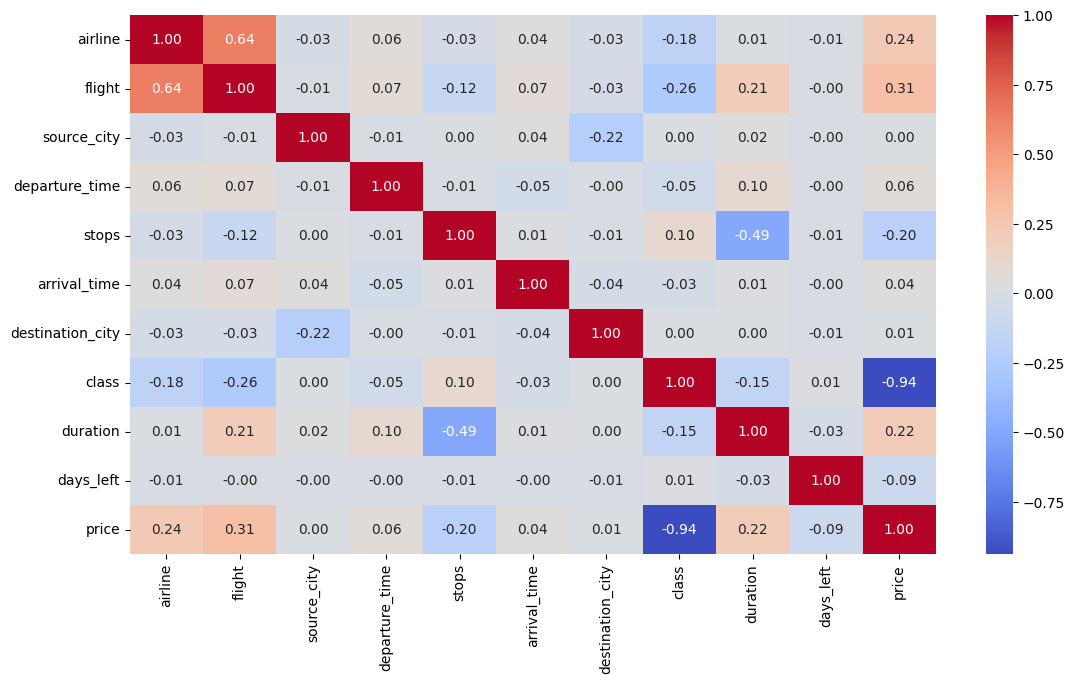

In [ ]:
plt.figure(figsize=(13, 7))  # Adjust the figure size as per your preference
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # cmap can be adjusted for color map
plt.show()

In [ ]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [ ]:
X_encoded = pd.get_dummies(df, columns=['stops','departure_time', 'source_city', 'destination_city','airline','arrival_time', 'class'], drop_first=True)

In [ ]:
X_encoded

,flight,duration,days_left,price,stops_1,stops_2,departure_time_1,departure_time_2,departure_time_3,departure_time_4,departure_time_5,source_city_1,source_city_2,source_city_3,source_city_4,source_city_5,destination_city_1,destination_city_2,destination_city_3,destination_city_4,destination_city_5,airline_1,airline_2,airline_3,airline_4,airline_5,arrival_time_1,arrival_time_2,arrival_time_3,arrival_time_4,arrival_time_5,class_1
0,1408,2.17,1,5953,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1
1,1387,2.33,1,5953,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
2,1213,2.17,1,5956,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,1559,2.25,1,5955,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,1549,2.33,1,5955,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1477,10.08,49,69265,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
300149,1481,10.42,49,77105,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
300150,1486,13.83,49,79099,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
300151,1483,10.00,49,81585,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0


In [ ]:
X = X_encoded.drop('price', axis=1)  # Replace 'target_column' with the actual name of your target column
y = X_encoded['price']

#Split Data

In [ ]:
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.30,random_state=42)

#  4-  ✈️| MODELING

In [ ]:
X_train.head()

,flight,duration,days_left,stops_1,stops_2,departure_time_1,departure_time_2,departure_time_3,departure_time_4,departure_time_5,source_city_1,source_city_2,source_city_3,source_city_4,source_city_5,destination_city_1,destination_city_2,destination_city_3,destination_city_4,destination_city_5,airline_1,airline_2,airline_3,airline_4,airline_5,arrival_time_1,arrival_time_2,arrival_time_3,arrival_time_4,arrival_time_5,class_1
85690,1339,2.67,11,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1
217536,1552,14.67,26,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
200529,1490,7.33,28,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
194101,409,1.08,6,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
159674,1529,14.17,11,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1


In [ ]:
X_train.describe()

,flight,duration,days_left,stops_1,stops_2,departure_time_1,departure_time_2,departure_time_3,departure_time_4,departure_time_5,source_city_1,source_city_2,source_city_3,source_city_4,source_city_5,destination_city_1,destination_city_2,destination_city_3,destination_city_4,destination_city_5,airline_1,airline_2,airline_3,airline_4,airline_5,arrival_time_1,arrival_time_2,arrival_time_3,arrival_time_4,arrival_time_5,class_1
count,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.00000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000,208544.000000
mean,1088.663663,12.068865,26.046758,0.041699,0.121001,0.222131,0.217781,0.00433,0.236746,0.161434,0.128107,0.205448,0.135760,0.154116,0.203123,0.133487,0.192108,0.142296,0.164397,0.197412,0.267689,0.077312,0.144521,0.030406,0.425800,0.050977,0.258813,0.046978,0.210363,0.305130,0.687442
std,426.742964,6.994368,13.550332,0.199900,0.326129,0.415679,0.412739,0.06566,0.425086,0.367931,0.334210,0.404030,0.342535,0.361061,0.402324,0.340102,0.393959,0.349354,0.370636,0.398046,0.442756,0.267087,0.351618,0.171702,0.494465,0.219952,0.437984,0.211592,0.407568,0.460464,0.463537
min,0.000000,0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,783.000000,6.750000,15.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1144.000000,11.170000,26.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1486.000000,16.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1560.000000,30.170000,49.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train.shape

(208544, 31)

In [ ]:
y_test.shape

(89376,)

In [ ]:
# Feature scaling for ANN


In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
# Initialize models
models = {
    "LR": LinearRegression(),
    "RF": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Train models and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluation on training data
    print(f"Model: {name} - Training Data")
    print("R² score:", r2_score(y_train, y_train_pred))
    print("MAE:", mean_absolute_error(y_train, y_train_pred))
    print("MSE:", mean_squared_error(y_train, y_train_pred))
    print("MAPE:", mean_absolute_percentage_error(y_train, y_train_pred))
    print("-" * 30)

    # Evaluation on test data
    print(f"Model: {name} - Test Data")
    print("R² score:", r2_score(y_test, y_test_pred))
    print("MAE:", mean_absolute_error(y_test, y_test_pred))
    print("MSE:", mean_squared_error(y_test, y_test_pred))
    print("MAPE:", mean_absolute_percentage_error(y_test, y_test_pred))
    print("-" * 30)


Model: LR - Training Data
R² score: 0.9127199470803753
MAE: 4554.906376469456
MSE: 44859588.92559172
MAPE: 0.46451042080075033
------------------------------
Model: LR - Test Data
R² score: 0.9125355571323865
MAE: 4555.685698735257
MSE: 44968922.48861624
MAPE: 0.4649653024972751
------------------------------
Model: RF - Training Data
R² score: 0.9985090802388599
MAE: 327.26068313917165
MSE: 766292.4731195966
MAPE: 0.022255247025118635
------------------------------
Model: RF - Test Data
R² score: 0.9897748626703909
MAE: 873.1527965665118
MSE: 5257146.709396218
MAPE: 0.05936894410566985
------------------------------


In [ ]:
from joblib import dump

# # For a scikit-learn model
dump(models['RF'], 'random_forest_model.joblib')

['random_forest_model.joblib']

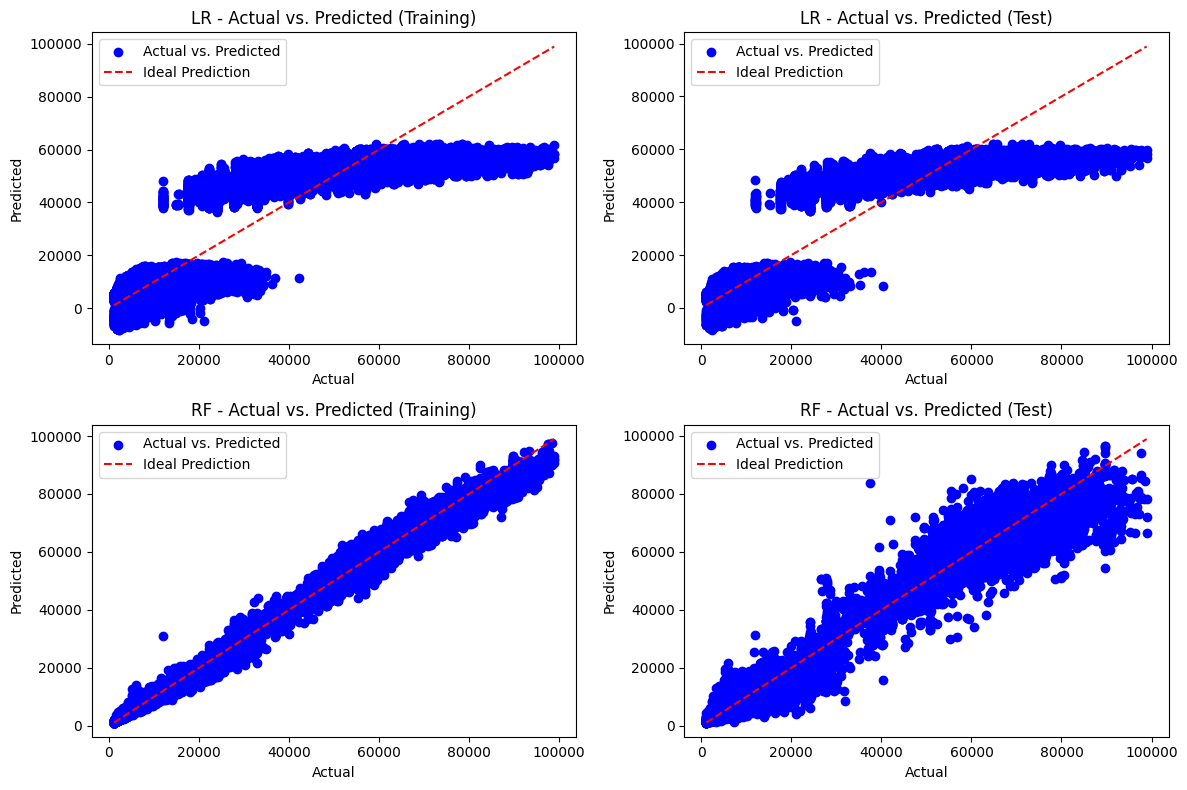

In [ ]:
import matplotlib.pyplot as plt

# Create subplots for each model
fig, axes = plt.subplots(nrows=len(models), ncols=2, figsize=(12, 8))

# Iterate through models and plot
for i, (name, model) in enumerate(models.items()):
    # Predictions on training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Plotting for training data
    ax = axes[i, 0]
    ax.scatter(y_train, y_train_pred, color='blue', label='Actual vs. Predicted')
    ax.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red', label='Ideal Prediction')
    ax.set_title(f'{name} - Actual vs. Predicted (Training)')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.legend()

    # Plotting for test data
    ax = axes[i, 1]
    ax.scatter(y_test, y_test_pred, color='blue', label='Actual vs. Predicted')
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Ideal Prediction')
    ax.set_title(f'{name} - Actual vs. Predicted (Test)')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


#Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Initialize the Polynomial Regression model
model_poly = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)), # You can change the degree as needed
    ('linear_regression', LinearRegression())
])

# Train the Polynomial Regression model
model_poly.fit(X_train, y_train)

# Evaluate the Polynomial Regression model
y_train_pred = model_poly.predict(X_train)
y_test_pred = model_poly.predict(X_test)

print("Model: Polynomial Regression - Training Data")
print("R² score:", r2_score(y_train, y_train_pred))
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("MAPE:", mean_absolute_percentage_error(y_train, y_train_pred))
print("-" * 30)

print("Model: Polynomial Regression - Test Data")
print("R² score:", r2_score(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("MAPE:", mean_absolute_percentage_error(y_test, y_test_pred))
print("-" * 30)


Model: Polynomial Regression - Training Data
R² score: 0.9528310883805684
MAE: 3177.8742506429667
MSE: 24243546.085654303
MAPE: 27.149995683366313
------------------------------
Model: Polynomial Regression - Test Data
R² score: 0.9526370151941541
MAE: 3197.6996611450886
MSE: 24351180.007941745
MAPE: 27.33772816089124
------------------------------


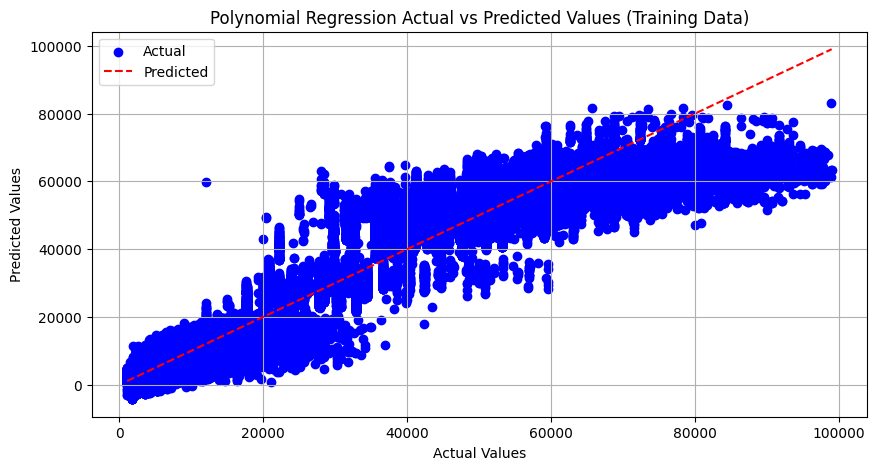

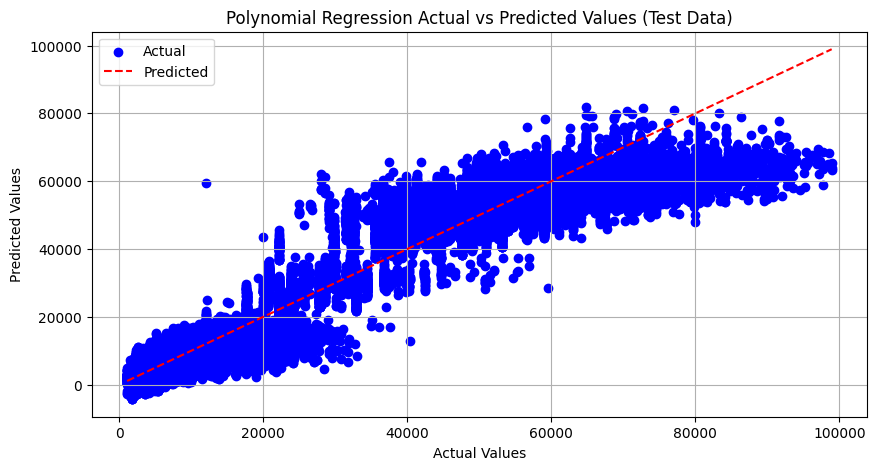

In [ ]:
# Plotting the actual vs predicted values for training data
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, color='blue', label='Actual')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red', label='Predicted')
plt.title('Polynomial Regression Actual vs Predicted Values (Training Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the actual vs predicted values for test data
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, color='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Predicted')
plt.title('Polynomial Regression Actual vs Predicted Values (Test Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


#ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Initialize the ANN model with L2 regularization
model_ANN = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)
])

model_ANN.compile(optimizer='adam', loss='mean_squared_error')
model_ANN.fit(X_train_scaled, y_train, epochs=60, batch_size=32, verbose=0)

# Evaluate the ANN model with L2 regularization
# ... (rest of the evaluation code)
# Predicting on training and test sets
y_train_pred_ANN = model_ANN.predict(X_train_scaled).flatten()
y_test_pred_ANN = model_ANN.predict(X_test_scaled).flatten()

# Evaluation on training data
print("Model: ANN with L2 Regularization - Training Data")
print("R² score:", r2_score(y_train, y_train_pred_ANN))
print("MAE:", mean_absolute_error(y_train, y_train_pred_ANN))
print("MSE:", mean_squared_error(y_train, y_train_pred_ANN))
print("MAPE:", mean_absolute_percentage_error(y_train, y_train_pred_ANN))
print("-" * 30)

# Evaluation on test data
print("Model: ANN with L2 Regularization - Test Data")
print("R² score:", r2_score(y_test, y_test_pred_ANN))
print("MAE:", mean_absolute_error(y_test, y_test_pred_ANN))
print("MSE:", mean_squared_error(y_test, y_test_pred_ANN))
print("MAPE:", mean_absolute_percentage_error(y_test, y_test_pred_ANN))
print("-" * 30)


2793/2793 [==============================] - 4s 2ms/step
Model: ANN with L2 Regularization - Training Data
R² score: 0.9811355866252051
MAE: 1711.518706915403
MSE: 9695798.76509743
MAPE: 0.13007817130055896
------------------------------
Model: ANN with L2 Regularization - Test Data
R² score: 0.9788212210121301
MAE: 1812.126168377716
MSE: 10888846.249790838
MAPE: 0.13573509520287333
------------------------------


2793/2793 [==============================] - 6s 2ms/step


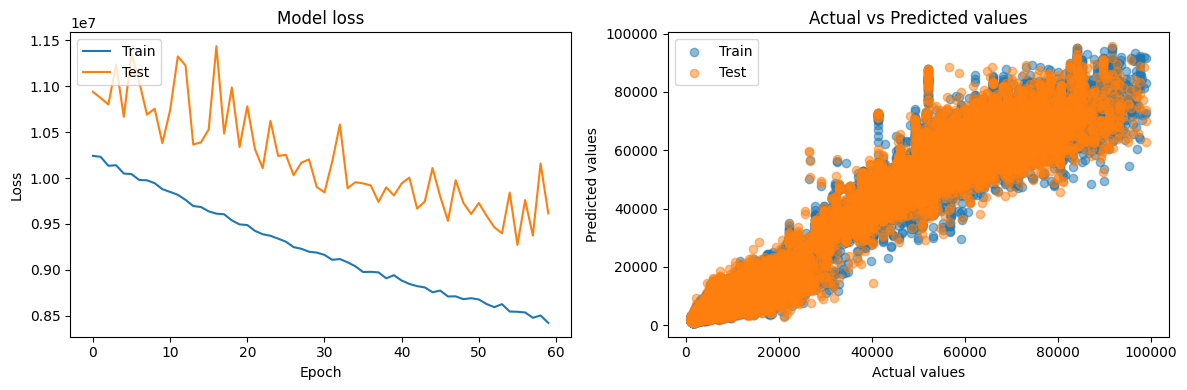

In [ ]:
import matplotlib.pyplot as plt

# Fit the model and save the history
history = model_ANN.fit(X_train_scaled, y_train, epochs=60, batch_size=32, verbose=0, validation_data=(X_test_scaled, y_test))

# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Predicting on training and test sets
y_train_pred_ANN = model_ANN.predict(X_train_scaled).flatten()
y_test_pred_ANN = model_ANN.predict(X_test_scaled).flatten()

# Plot actual vs predicted values
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_train_pred_ANN, alpha=0.5, label='Train')
plt.scatter(y_test, y_test_pred_ANN, alpha=0.5, label='Test')
plt.title('Actual vs Predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from tabulate import tabulate

# Define performance scores
LR_train_scores = {
    "R²": 0.9127199470803753,
    "MAE": 4554.906376469456,
    "MSE": 44859588.92559172,
    "MAPE": 0.46451042080075033
}

LR_test_scores = {
    "R²": 0.9125355571323865,
    "MAE": 4555.685698735257,
    "MSE": 44968922.48861624,
    "MAPE": 0.4649653024972751
}

RF_train_scores = {
    "R²": 0.9985090802388599,
    "MAE": 327.26068313917165,
    "MSE": 766292.4731195966,
    "MAPE": 0.022255247025118635
}

RF_test_scores = {
    "R²": 0.9897748626703909,
    "MAE": 873.1527965665118,
    "MSE": 5257146.709396218,
    "MAPE": 0.05936894410566985
}

poly_train_scores = {
    "R²": 0.9441178240292004,
    "MAE": 3358.5070762224655,
    "MSE": 28721928.533042707,
    "MAPE": 0.26194130939267257
}

poly_test_scores = {
    "R²": 0.9440712750805141,
    "MAE": 3365.3894285865267,
    "MSE": 28755165.108617883,
    "MAPE": 0.2622664229776816
}

ANN_train_scores = {
    "R²": 0.9811355866252051,
    "MAE": 1711.518706915403,
    "MSE": 9695798.76509743,
    "MAPE": 0.13007817130055896
}

ANN_test_scores = {
    "R²": 0.9788212210121301,
    "MAE": 1812.126168377716,
    "MSE": 10888846.249790838,
    "MAPE": 0.13573509520287333
}

# Create a list of dictionaries for training and test scores
train_scores = [LR_train_scores, RF_train_scores, poly_train_scores, ANN_train_scores]
test_scores = [LR_test_scores, RF_test_scores, poly_test_scores, ANN_test_scores]

# Define model names
models = ["Linear Regression", "Random Forest", "Polynomial Regression", "ANN with L2 Regularization"]

# Print out the comparison
print("Model Performance Comparison:")
print("-" * 80)

# Print training scores
print("Training Scores:")
print(tabulate(train_scores, headers="keys", showindex=models, tablefmt="pretty"))

# Print test scores
print("\nTest Scores:")
print(tabulate(test_scores, headers="keys", showindex=models, tablefmt="pretty"))
print("-" * 80)


Model Performance Comparison:
--------------------------------------------------------------------------------
Training Scores:
+----------------------------+--------------------+--------------------+--------------------+----------------------+
|                            |         R²         |        MAE         |        MSE         |         MAPE         |
+----------------------------+--------------------+--------------------+--------------------+----------------------+
|     Linear Regression      | 0.9127199470803753 | 4554.906376469456  | 44859588.92559172  | 0.46451042080075033  |
|       Random Forest        | 0.9985090802388599 | 327.26068313917165 | 766292.4731195966  | 0.022255247025118635 |
|   Polynomial Regression    | 0.9441178240292004 | 3358.5070762224655 | 28721928.533042707 | 0.26194130939267257  |
| ANN with L2 Regularization | 0.9811355866252051 | 1711.518706915403  |  9695798.76509743  | 0.13007817130055896  |
+----------------------------+--------------------+--